# Brownian Motion & Atomic Theory

### Peter Onyisi
<img src="images/texas_logo.png" width="400" align="left"/>

The question of whether or not matter was made of "atoms" was a major debate of 19th century science. Chemistry gave many reasons to believe this to be true, in particular:
* elements always combine in fixed proportions to make specific compounds
* different compounds of the same elements seemed to be made of different ratios of elements in small integer ratios - e.g. if combining $x$ amount of hydrogen with $y$ amount of oxygen gives water, then combining the same amount of hydrogen with $2y$ amount of oxygen gives hydrogen peroxide.
Statistical mechanics, which we will encounter very shortly, also required atoms for it to make sense.

Of course this did not _prove_ that atoms existed. Atoms had to be very very small - far smaller than anything that could be seen with an optical microscope - and if you couldn't see one, how could you really believe they existed? (So said the philosophical school of the Positivists.)

Brownian motion is named after Robert Brown (1827) but had been observed long ago - it can be seen with dust in air. It is the jittery, random motion of macroscopic objects in a fluid. Proponents of atoms, and the "kinetic theory," suggested that it came from the collisions of randomly-moving atoms with the macroscopic objects. Critics pointed out that since atoms were supposedly really small, any given collision should really not affect a big object that much.

This concern was resolved by Einstein in a paper in 1905 (http://users.physik.fu-berlin.de/~kleinert/files/eins_brownian.pdf). In modern language, Einstein realized that there would be fluctuations in a random process, so sometimes for a period of time the big particle would get more collisions from one side than from another, enough to give the particle a net velocity. This would then get dissipated by friction with the fluid (which is, really, just more collisions with atoms). 
```{sidebar}
![image.png](attachment:image.png)
```

Because this random buffeting by collisions is a random-walk-like process, the standard deviation of the distance moved increases with the square root of time, depending on the "diffusion coefficient" $D$, which Einstein was able to relate to measurable quantities and the number of molecules in a "mole" (a commonly used counting unit in chemistry) - aka Avogadro's Number. He also showed that reasonable estimates for this number gave motions that were macroscopically visible.

A series of experiments by Jean Perrin measured Avogadro's Number in multiple ways (including Brownian motion) and showed that all these values were consistent, leading to a wide acceptance of the atomic theory.

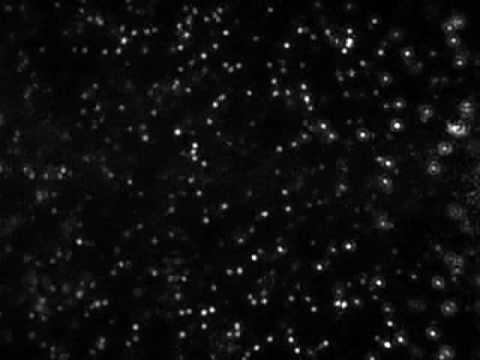

In [1]:
from IPython.display import YouTubeVideo, HTML
YouTubeVideo('cDcprgWiQEY', width=901, height=676)

In [2]:
# import Python packages
import numpy
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
import math
import tqdm.notebook
from matplotlib import animation

In [3]:
SCALING=0.1
NPARTICLES=int(1000*SCALING)
NDIMS=2 # 2 dimensions
SIZE=numpy.array([10,5]) # size of box
DELTAT=0.1
masses = numpy.array([500.]+[1.*(1/SCALING)]*(NPARTICLES-1))
radii = numpy.array([0.05*10**(1/NDIMS)]+[0.05*(1/SCALING**(1/NDIMS))]*(NPARTICLES-1))

positions = (numpy.random.uniform(-0.5, 0.5, size=(NPARTICLES,NDIMS)))*SIZE
velocities = (numpy.random.normal(0, 1, size=(NPARTICLES,NDIMS)))
# start particle 0 from rest
velocities[0]=[0,0]

In [4]:
def timestep():
    global positions
    positions = positions + DELTAT*velocities
    bounce_at_edges()
    bounce_internally()
    
def bounce_internally():
    # find pairs i, j which are closer than the sum of their radii
    # first "colliding" pair terminates search for index i
    for i, ipos in enumerate(positions):
        deltax = ipos-positions[i+1:]
        mindeltar = radii[i]+radii[i+1:]
        deltar = numpy.linalg.norm(deltax, axis=1)
        hits = numpy.nonzero(deltar < mindeltar)
        if len(hits[0]): # a collision is happening
            j = i+1+hits[0][0]
            v_cm = (masses[i]*velocities[i]+masses[j]*velocities[j])/(masses[i]+masses[j])
            # now reflect velocity around separation vector
            # project velocity onto separation vector:
            ivelproj = numpy.dot(velocities[i]-v_cm, deltax[hits[0][0]])/deltar[hits[0][0]]**2*deltax[hits[0][0]]
            ideltav = 2*(velocities[i]-v_cm-ivelproj)
            jvelproj = numpy.dot(velocities[j]-v_cm, deltax[hits[0][0]])/deltar[hits[0][0]]**2*deltax[hits[0][0]]
            jdeltav = 2*(velocities[j]-v_cm-jvelproj)
            #print(velocities[i]-v_cm, velocities[j]-v_cm)
            #print(numpy.dot(velocities[i],velocities[i])+numpy.dot(velocities[j],velocities[j]))
            velocities[i]-=ideltav
            velocities[j]-=jdeltav
            #print(masses[i]*numpy.dot(velocities[i],velocities[i])+masses[j]*numpy.dot(velocities[j],velocities[j]))

def bounce_at_edges():
    global velocities, positions
    gone_too_far = numpy.abs(positions)//(SIZE/2)
    posmarker, extrapos = numpy.divmod(positions, (SIZE/2))
    #print(gone_too_far)
    # if we have gone 1, 3, 5, ... times the half-size of the box, reverse velocity in that dimension
    velocities = numpy.where(gone_too_far%2, -velocities, velocities)
    # wrap positions. (assume nothing is so far that it )
    positions=numpy.where(positions>(SIZE/2), SIZE-positions, positions)
    positions=numpy.where(positions<(-SIZE/2), -SIZE-positions, positions)
    if numpy.any(positions>(SIZE/2)) or numpy.any(positions < (-SIZE/2)):
        print("Particle went too fast!")

In [5]:
NFRAMES=500
pos0 = []
posall = []
for i in tqdm.notebook.tqdm(range(NFRAMES)):
    timestep()
    pos0.append(positions[0])
    posall.append(positions)
pos0 = numpy.array(pos0)
posall = numpy.array(posall)

In [20]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
line, = plt.plot([],[], 'r')
plt.xlim(-SIZE[0]/2,SIZE[0]/2)
plt.ylim(-SIZE[1]/2,SIZE[1]/2)
fig.axes[0].set_aspect('equal')
def animate(i):
    line.set_data(pos0[:i,0], pos0[:i,1])
    return [line]

anim = animation.FuncAnimation(fig, animate,
                               #frames=100,
                               frames=len(pos0), 
                               repeat=False)
plt.close()
HTML(anim.to_jshtml(fps=20))

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
circles = [plt.Circle(posall[0][j], radii[j], color='b' if j == 0 else 'r') for j in range(NPARTICLES)]
for circle in circles:
    ax.add_artist(circle)
ax.set_aspect('equal')
plt.xlim(-SIZE[0]/2,SIZE[0]/2)
plt.ylim(-SIZE[1]/2,SIZE[1]/2)

def animate(i):
    for j in range(NPARTICLES):
        circles[j].set_center(posall[i][j])
    return circles

anim = animation.FuncAnimation(fig, animate,
                               frames=100,
                               #frames=len(pos0), 
                              repeat=False)
plt.close()
HTML(anim.to_jshtml(fps=20))